In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/customer churn/Churn_Modelling.csv')

In [ ]:
df.drop(columns = ['Surname'], inplace = True)

In [ ]:
cat = ['Geography', 'Gender']

def one_hot(data, col):
    for _ in col:
        data[_] = pd.Categorical(df[_]).codes
    return data

df = one_hot(df, cat)

In [ ]:
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,0,1,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,709,0,0,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

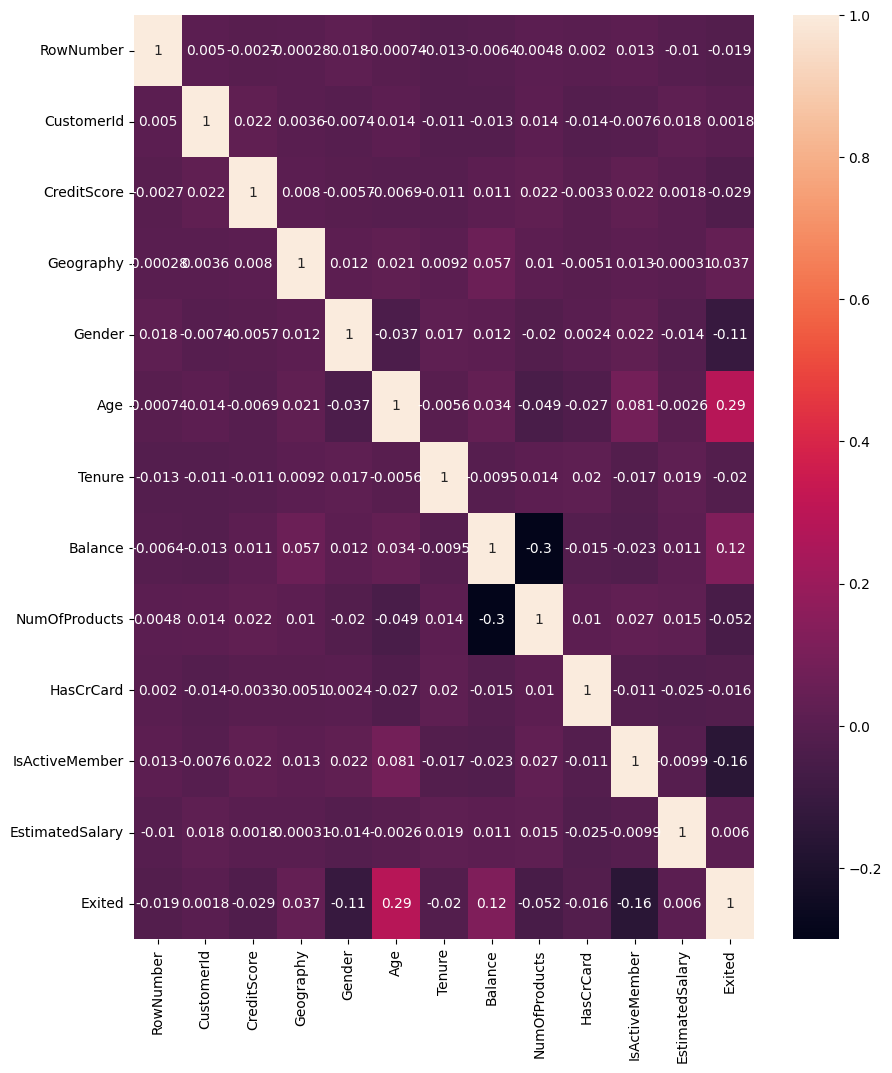

In [ ]:
correlation_data = pd.concat([X_train, y_train], axis=1)
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.8053333333333333


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       1.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.90      0.50      0.45      3000
weighted avg       0.84      0.81      0.72      3000



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth = 5, n_estimators = 300)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred1,y_test)
print(score)

0.858


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1, zero_division=1))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2416
           1       0.87      0.32      0.47       584

    accuracy                           0.86      3000
   macro avg       0.86      0.65      0.69      3000
weighted avg       0.86      0.86      0.83      3000



Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=400, learning_rate=0.05, random_state=100, max_features=7 )
gbc.fit(X_train, y_train)
y_pred2 = gbc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred2,y_test)
print(score)

0.87


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2, zero_division=1))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.47      0.58       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.87      0.86      3000

